In [390]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

In [391]:
#importing dataset
day = pd.read_csv('day.csv')
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [392]:
# checking descriptions
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### The dataset has no null objects.

In [393]:
day.shape

(730, 16)

In [394]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Univariate Analysis

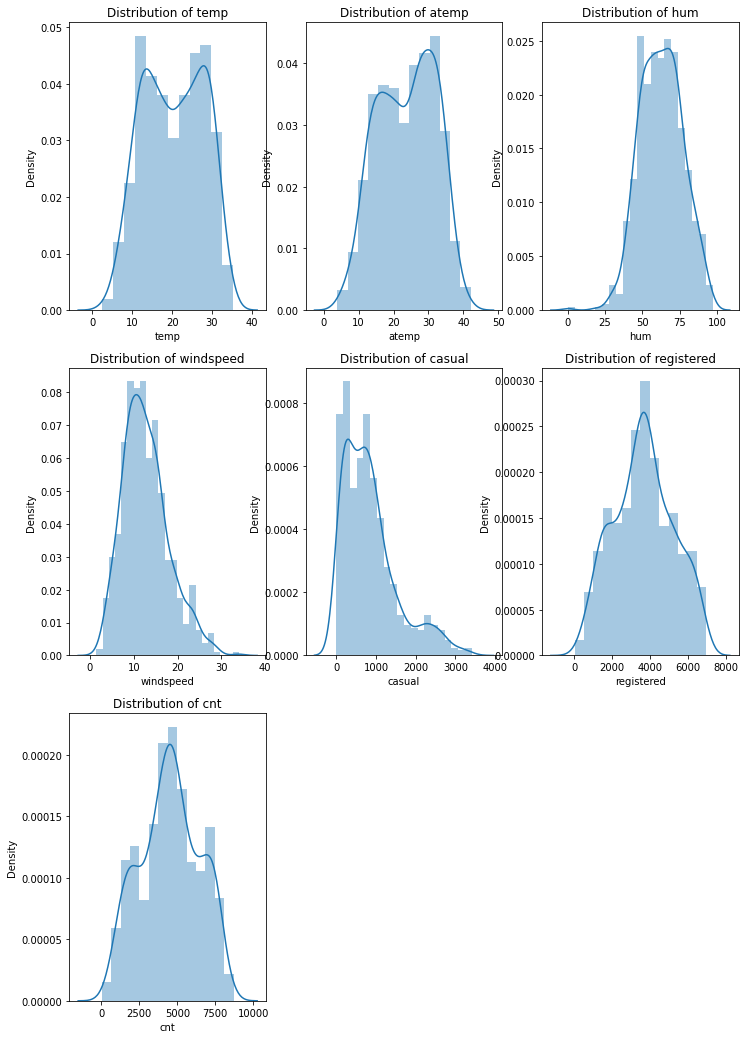

In [395]:
#checking distribution of continuous data to check outliers
cont_vars = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

plt.figure(figsize=(12,18))
for i,v in enumerate(cont_vars):
    plt.subplot(3,3,i+1)
    sns.distplot(day[v])
    plt.title('Distribution of ' + v)
    plt.xlabel(v)
    plt.ylabel('Density')
plt.show()

- Distribution of **'casual'** seems right skewed. We need to check if sum of **'casual'** and **'registered'** is equal to **'cnt'**
- Distribution of **'temp'** and '**'atemp'** shows similar distribution. There can be high collinearity between these variables

In [396]:
# validating if sum of 'casual' and 'registered' is equal to 'cnt'
day[(day['casual'] + day['registered']) == day['cnt']].shape

(730, 16)

#### Since the number of rows after filtering has not changed and is 730, we can validate that sum of 'casual' and 'registered' is equal to 'cnt'.

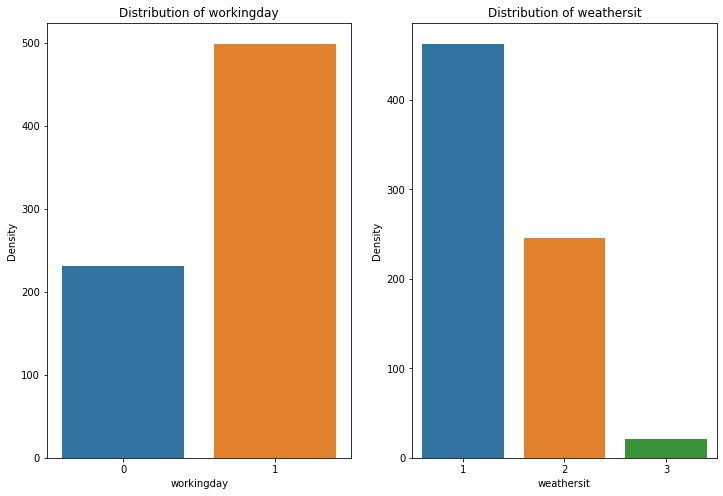

In [397]:
# checking distribution of categorical variable
cat_vars = ['workingday', 'weathersit']
plt.figure(figsize=(12,8))
for i,v in enumerate(cat_vars):
    plt.subplot(1,2,i+1)
    sns.countplot(day[v])
    plt.title('Distribution of ' + v)
    plt.xlabel(v)
    plt.ylabel('Density')
plt.show()

- The distribution of weather situation shows that most of the day, value of weather is 1 i.e., it is clear.

### Bivariate Analysis

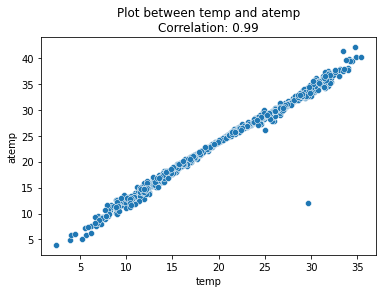

In [398]:
# distribution of 'temp' and 'atemp' are similar. Checking the correlation
corr = round(np.corrcoef(day['temp'], day['atemp'])[0][1],2)
sns.scatterplot(x = 'temp', y = 'atemp', data=day)
plt.title('Plot between temp and atemp' + '\nCorrelation: ' + str(corr))
plt.show()

#### removing non-relevat features
- **'instant'** : index of data, not needed to build model
- **'casual'** and **'registered'** : Since target variable **'cnt'** is sum of these features, it should be removed.
- **'dteday'** : Since all the features from the data is available in other features, it is not needed.

In [399]:
day.drop(['instant', 'casual', 'registered', 'dteday'], axis=1, inplace=True)

In [400]:
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


####  'season' and 'weathersit' have numerical variables associated with them, but the labels doesn't have any order.
#### Therefore converting these variable type to object.

In [401]:
day[['season', 'weathersit']] = day[['season', 'weathersit']].astype(object)

In [402]:
day.dtypes

season         object
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit     object
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [403]:
day.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

## Data Visualization

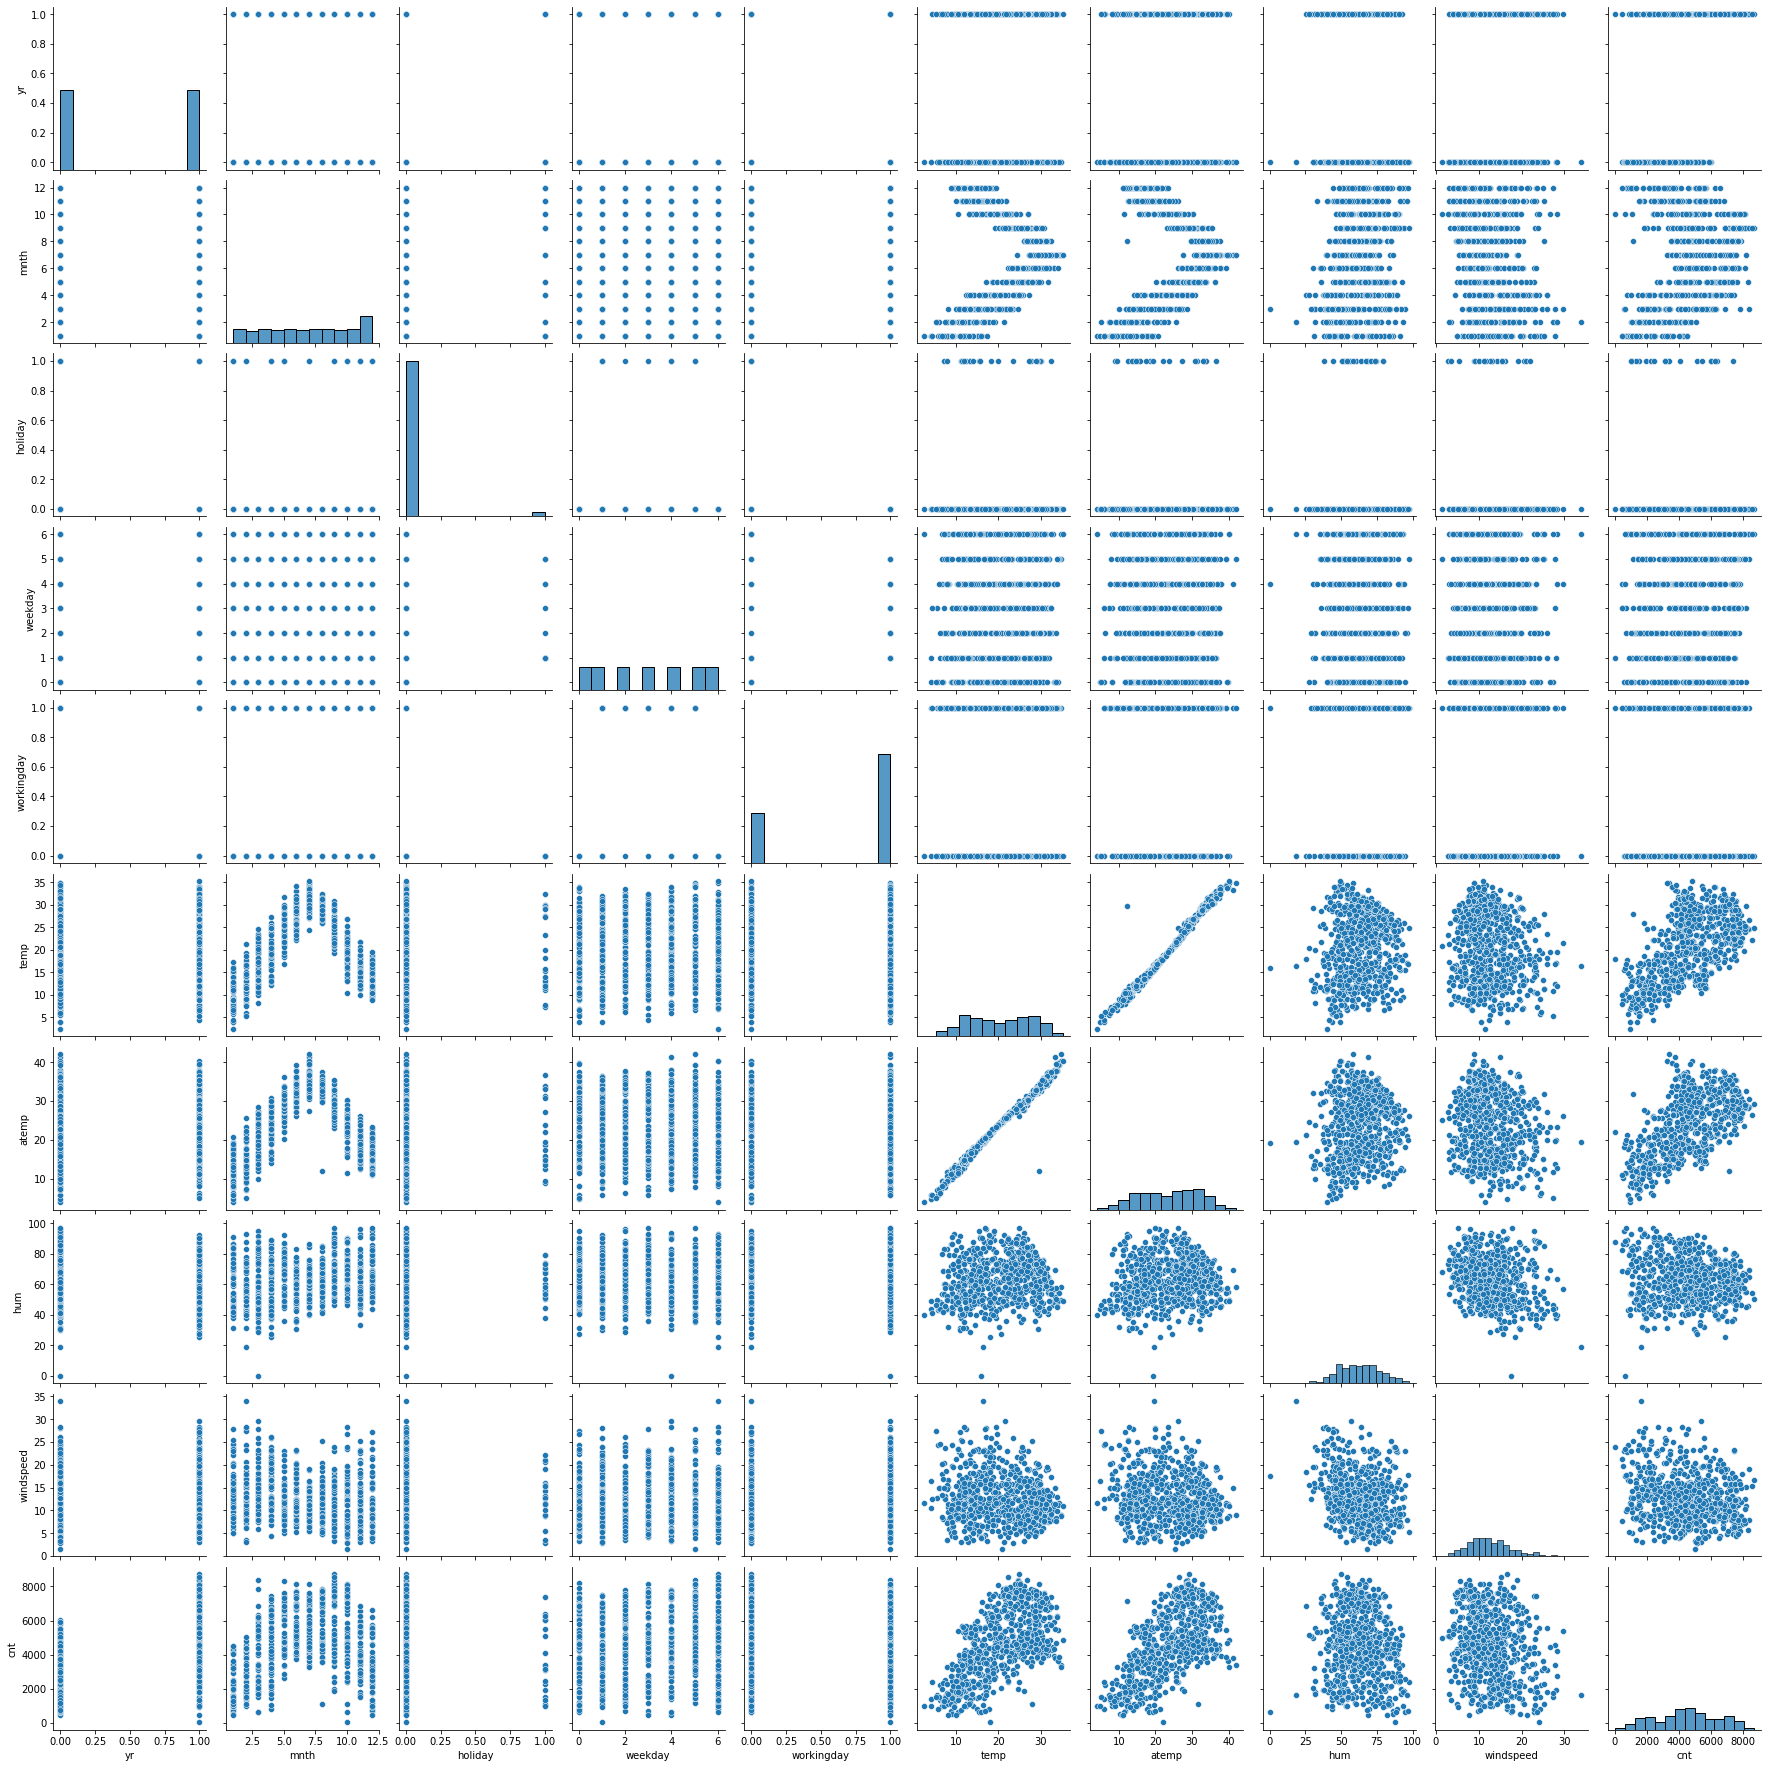

In [404]:
#pairplot for all numerical variables

sns.pairplot(day.select_dtypes(include=['int', 'float']))
plt.show()

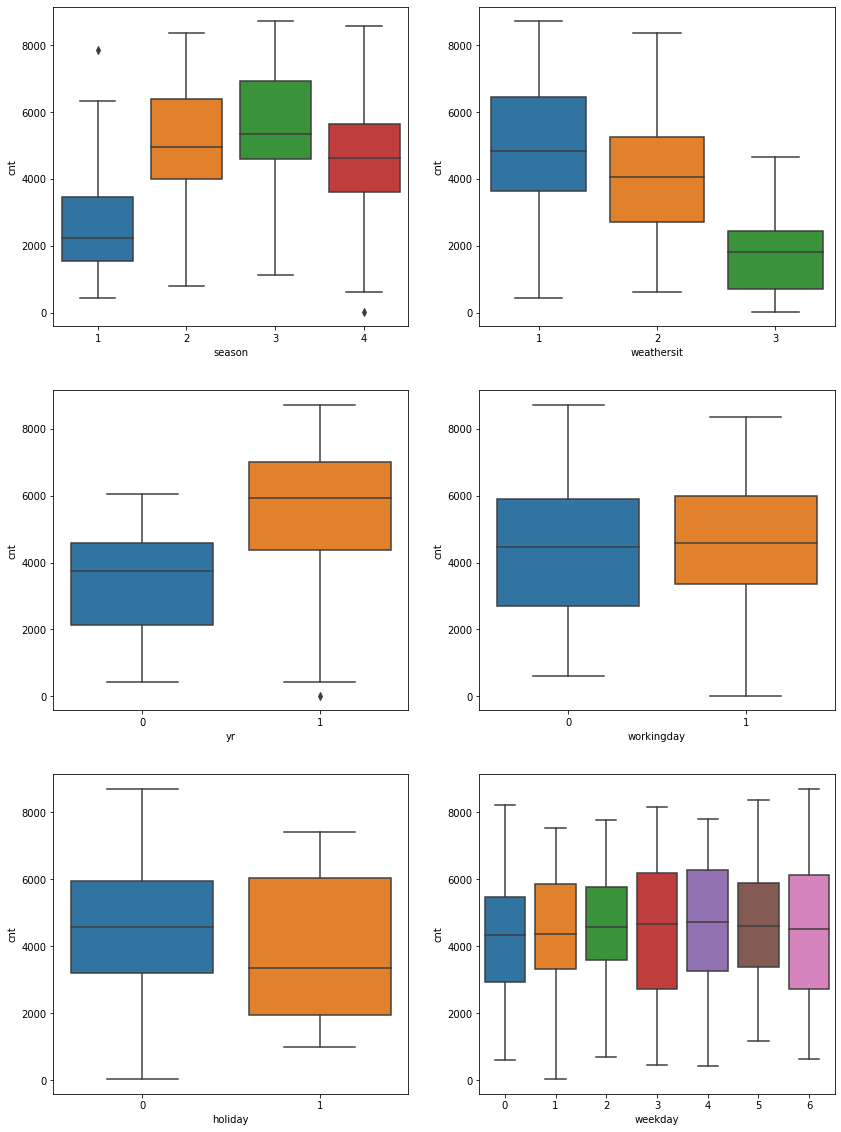

In [405]:
# plotting 'season' and 'weathersit' against 'cnt'
plt.figure(figsize=(14,20))

plt.subplot(3,2,1)
sns.boxplot(x = 'season', y = 'cnt', data= day)

plt.subplot(3,2,2)
sns.boxplot(x = 'weathersit', y = 'cnt', data= day)

plt.subplot(3,2,3)
sns.boxplot(x = 'yr', y = 'cnt', data= day)

plt.subplot(3,2,4)
sns.boxplot(x = 'workingday', y = 'cnt', data= day)

plt.subplot(3,2,5)
sns.boxplot(x = 'holiday', y = 'cnt', data= day)

plt.subplot(3,2,6)
sns.boxplot(x = 'weekday', y = 'cnt', data= day)

plt.show()

#### Inferences made from plot
- The variable **'yr'** , **'mnth'**, **'holiday'**, and **'temp'** shows some relationship with **'cnt'**.
- The variable **'season'** and **'weathersit'** also shows linear relationship with the target variable.
- From the distribution plot of variables in diagonals we can see that there are no outliers.

## Data Preparation

In [406]:
# creating dummy variables for object type data

day = pd.get_dummies(day, prefix = ['season', 'weathersit'], drop_first=True )

In [407]:
day.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,weathersit_2,weathersit_3
0,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,1,0
1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,0,1,0
2,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0
3,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0
4,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0


## Splitting the data into training and test set

In [408]:
#creating training and testing dataframes
day_train, day_test = train_test_split(day, train_size= 0.7, random_state=30)
print(day_train.shape)
print(day_test.shape)

(510, 15)
(220, 15)


In [409]:
#rescaling numerical variables using MinMaxScaler
scaler = MinMaxScaler()

#create a list of features to be scaled
num_vars = ['mnth' , 'weekday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']

#scaling the data
day_train[num_vars] = scaler.fit_transform(day_train[num_vars])

day_train.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,weathersit_2,weathersit_3
155,0,0.454545,0,0.000000,0,0.720868,0.690038,0.670951,0.239759,0.561896,1,0,0,1,0
108,0,0.272727,0,0.333333,1,0.534417,0.513618,0.684661,0.279504,0.366084,1,0,0,1,0
493,1,0.363636,0,0.500000,1,0.624917,0.601819,0.765210,0.399983,0.540152,1,0,0,1,0
405,1,0.090909,0,0.833333,1,0.240020,0.242927,0.555270,0.194894,0.438219,0,0,0,1,0
90,0,0.272727,0,0.833333,1,0.265099,0.228951,0.705656,0.487178,0.253682,1,0,0,1,0


In [410]:
day_train.describe()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.496078,0.491266,0.037255,0.503268,0.660784,0.516161,0.490106,0.647173,0.345580,0.509120,0.252941,0.243137,0.239216,0.349020,0.029412
std,0.500476,0.315557,0.189572,0.339321,0.473908,0.240757,0.226141,0.145878,0.157766,0.222752,0.435124,0.429398,0.427024,0.477128,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.181818,0.000000,0.166667,0.000000,0.307623,0.293997,0.534597,0.232055,0.354119,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.454545,0.000000,0.500000,1.000000,0.498436,0.489165,0.645673,0.321786,0.521859,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.795455,0.000000,0.833333,1.000000,0.726592,0.677806,0.754820,0.435589,0.672141,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Training the data
#### Using sklearn LinearRegression to build a model

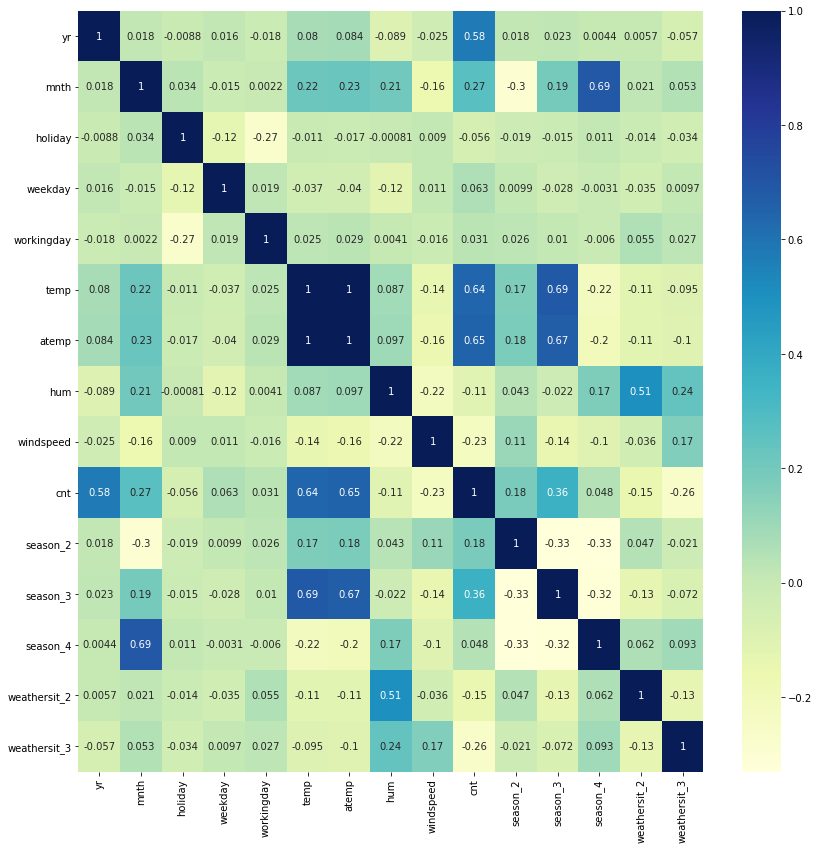

In [411]:
#Checking the correlation between variables
plt.figure(figsize=(14,14))
sns.heatmap(day_train.corr(), annot=True, cmap='YlGnBu')
plt.show()

#### The variables 'temp' and 'atemp' are highly correlated. One of them can be dropped.

In [412]:
#creating predictor and target training variable
y_train = day_train['cnt']
X_train = day_train.drop(['cnt', 'temp'], axis=1)

In [413]:
print(y_train.shape)
print(X_train.shape)

(510,)
(510, 13)


In [414]:
#creating instant of linear regression
lm = LinearRegression()

#training the model without any feature elimination
lm.fit(X_train, y_train)

LinearRegression()

In [415]:
#predicitng target variable
y_train_pred = lm.predict(X_train)

In [416]:
#checking r2_score
r2_score(y_true= y_train, y_pred=y_train_pred)

0.8256989390631787

In [417]:
#using RFE(recursive feature elimination) to reduce the dimension of data
rfe = RFE(lm, 11)
rfe = rfe.fit(X_train,y_train)

In [418]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('mnth', False, 3),
 ('holiday', True, 1),
 ('weekday', True, 1),
 ('workingday', False, 2),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [419]:
#columns to choose for training the data
col_train = X_train.columns[rfe.support_]
col_train

Index(['yr', 'holiday', 'weekday', 'atemp', 'hum', 'windspeed', 'season_2',
       'season_3', 'season_4', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [420]:
#columns to be excluded from training data
X_train.columns[~rfe.support_]

Index(['mnth', 'workingday'], dtype='object')

## Building model using statsmodel

In [421]:
#creating training data
X_train_rfe = X_train[col_train]

In [422]:
#adding constant to variable
X_train_sm = sm.add_constant(X_train_rfe)

In [423]:
#creating model using statsmodel
lm = sm.OLS(y_train, X_train_sm) #creating an instant
lm_model = lm.fit() #training the model
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     214.0
Date:                Wed, 01 Sep 2021   Prob (F-statistic):          9.43e-181
Time:                        09:21:42   Log-Likelihood:                 487.76
No. Observations:                 510   AIC:                            -951.5
Df Residuals:                     498   BIC:                            -900.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2334      0.030      7.755      0.000       0.174       0.293
yr               0.2258      0.008     26.691      0.000       0.209       0.242
holiday         -0.0440      0.022     -1.981      0.048      -0.088      -0.000
weekday          0.0393      0.013      3.139      0.002       0.015       0.064
atemp            0.4590      0.034     13.499      0.000       0.392       0.526
hum             -0.1612      0.039     -4.100      0.000      -0.238      -0.084
windspeed       -0.1563      0.029     -5.437      0.000      -0.213      -0.100
season_2         0.1402      0.015      9.071      0.000       0.110       0.171
season_3         0.0971      0.020      4.750      0.000       0.057       0.137
season_4         0.1648      0.013     12.603      0.000       0.139       0.191
weathersit_2    -0.0381      0.011     -3.424      0.001      -0.060      -0.016
weathersit_3    -0.2123      0.028     -7.548      0.000      -0.268      -0.157
==============================================================================
Omnibus:                       66.723   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.771
Skew:                          -0.711   Prob(JB):                     8.17e-33
Kurtosis:                       5.220   Cond. No.                         20.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### The p-value of all variables coeffcients are significant (less than 0.05). 

In [424]:
#checking variance inflation factor
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif

,Features,VIF
0,yr,1.96
1,holiday,1.06
2,weekday,2.97
3,atemp,18.77
4,hum,14.57
5,windspeed,4.55
6,season_2,3.45
7,season_3,5.82
8,season_4,2.36
9,weathersit_2,2.19


- VIF of **'hum'** and **'atemp'** is too high.
- Since the variable **'atemp'** has high correlation with target variable, we will first remove **'hum'**.

In [425]:
#removing 'hum' variable from dataset
X_train_rfe.drop(['hum'], axis=1, inplace=True)

In [426]:
#creating model after dropping variable

#adding constant to variable
X_train_sm = sm.add_constant(X_train_rfe)

#creating model using statsmodel
lm = sm.OLS(y_train, X_train_sm) #creating an instant
lm_model = lm.fit() #training the model
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     226.6
Date:                Wed, 01 Sep 2021   Prob (F-statistic):          2.30e-178
Time:                        09:21:42   Log-Likelihood:                 479.30
No. Observations:                 510   AIC:                            -936.6
Df Residuals:                     499   BIC:                            -890.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1356      0.019      7.275      0.000       0.099       0.172
yr               0.2303      0.009     27.026      0.000       0.214       0.247
holiday         -0.0453      0.023     -2.010      0.045      -0.090      -0.001
weekday          0.0454      0.013      3.600      0.000       0.021       0.070
atemp            0.4354      0.034     12.791      0.000       0.369       0.502
windspeed       -0.1228      0.028     -4.386      0.000      -0.178      -0.068
season_2         0.1387      0.016      8.842      0.000       0.108       0.170
season_3         0.1008      0.021      4.857      0.000       0.060       0.142
season_4         0.1586      0.013     12.020      0.000       0.133       0.184
weathersit_2    -0.0651      0.009     -7.158      0.000      -0.083      -0.047
weathersit_3    -0.2608      0.026    -10.054      0.000      -0.312      -0.210
==============================================================================
Omnibus:                       62.247   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              129.351
Skew:                          -0.689   Prob(JB):                     8.16e-29
Kurtosis:                       5.047   Cond. No.                         14.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [427]:
#checking variance inflation factor
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif

,Features,VIF
0,yr,1.95
1,holiday,1.05
2,weekday,2.81
3,atemp,13.68
4,windspeed,3.97
5,season_2,3.43
6,season_3,5.65
7,season_4,2.28
8,weathersit_2,1.50
9,weathersit_3,1.10


- **'season_3'** has high VIF and also is highly correlated with **'atemp'**
- **'atemp'** has high correlation with target variable.
- So, we will first remove **'season_3'** and check.

In [428]:
#removing 'season_3' variable from dataset
X_train_rfe.drop(['season_3'], axis=1, inplace=True)

In [429]:
#creating model after dropping variable 'atemp'

#adding constant to dataset
X_train_sm = sm.add_constant(X_train_rfe)

#creating model using statsmodel
lm = sm.OLS(y_train, X_train_sm) #creating an instant
lm_model = lm.fit() #training the model
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     238.4
Date:                Wed, 01 Sep 2021   Prob (F-statistic):          1.40e-174
Time:                        09:21:42   Log-Likelihood:                 467.52
No. Observations:                 510   AIC:                            -915.0
Df Residuals:                     500   BIC:                            -872.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1192      0.019      6.359      0.000       0.082       0.156
yr               0.2283      0.009     26.237      0.000       0.211       0.245
holiday         -0.0474      0.023     -2.057      0.040      -0.093      -0.002
weekday          0.0459      0.013      3.558      0.000       0.021       0.071
atemp            0.5695      0.020     27.985      0.000       0.530       0.610
windspeed       -0.1257      0.029     -4.392      0.000      -0.182      -0.069
season_2         0.0820      0.011      7.658      0.000       0.061       0.103
season_4         0.1215      0.011     11.046      0.000       0.100       0.143
weathersit_2    -0.0647      0.009     -6.965      0.000      -0.083      -0.046
weathersit_3    -0.2553      0.026     -9.637      0.000      -0.307      -0.203
==============================================================================
Omnibus:                       47.688   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               91.481
Skew:                          -0.567   Prob(JB):                     1.37e-20
Kurtosis:                       4.738   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [430]:
#checking variance inflation factor
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif

,Features,VIF
0,yr,1.94
1,holiday,1.05
2,weekday,2.80
3,atemp,3.68
4,windspeed,3.86
5,season_2,1.55
6,season_4,1.40
7,weathersit_2,1.50
8,weathersit_3,1.10


- The p-value of all variables shows that they are significant.
- The VIF of features are now within limit (VIF<4).

## Residual analysis of training data

In [431]:
#predicting on training data
y_train_pred = lm_model.predict(X_train_sm)

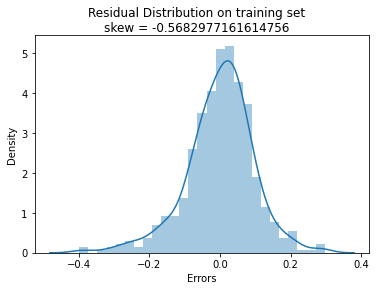

In [432]:
#plotting residual
res = y_train - y_train_pred
skew = res.skew()
std_dev = res.std()
sns.distplot(res)
plt.suptitle('Residual Distribution on training set' + '\nskew = ' + str(skew))
plt.xlabel('Errors')
plt.show()

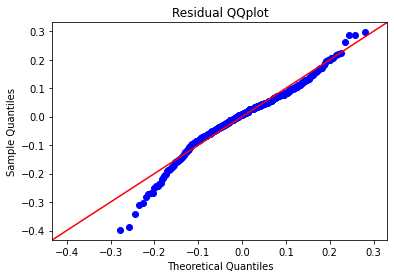

In [441]:
# plotting the Q-Q plot of residual against normal distribution
fig = sm.qqplot(res, line='45', loc=0, scale=std_dev)
plt.title('Residual QQplot')
plt.savefig('Residual_QQplot')
plt.show()

#### From the plot we can visulize that the distribution of residuals is mostly normal.

## Prediction and evaluation on test set

In [434]:
#rescaling the test data
#create a list of features to be scaled
num_vars = ['mnth' , 'weekday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']

#scaling the data
day_test[num_vars] = scaler.transform(day_test[num_vars])

day_test.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,weathersit_2,weathersit_3
293,0,0.818182,0,0.833333,1,0.431924,0.422794,0.590403,0.410258,0.492637,0,0,1,0,0
334,0,1.000000,0,0.666667,1,0.281454,0.259520,0.539417,0.407706,0.426254,0,0,1,0,0
158,0,0.454545,0,0.500000,1,0.887692,0.842846,0.639674,0.235894,0.503797,1,0,0,0,0
677,1,0.909091,0,0.833333,1,0.345786,0.328484,0.556126,0.396161,0.686838,0,0,1,0,0
642,1,0.818182,0,0.833333,1,0.677254,0.639390,0.645244,0.173084,0.935803,0,0,1,0,0


In [435]:
day_test.describe()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,weathersit_2,weathersit_3
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000,220.000000,220.000000,220.000000,220.000000
mean,0.509091,0.528099,0.009091,0.490909,0.736364,0.532274,0.500508,0.641292,0.348857,0.532307,0.250,0.290909,0.254545,0.309091,0.027273
std,0.501057,0.308378,0.095128,0.323160,0.441609,0.236927,0.224246,0.147862,0.164998,0.222356,0.434,0.455217,0.436599,0.463173,0.163248
min,0.000000,0.000000,0.000000,0.000000,0.000000,-0.050062,-0.053751,0.261354,0.050010,0.078578,0.000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.272727,0.000000,0.166667,0.000000,0.332227,0.319763,0.534704,0.228196,0.373073,0.000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.545455,0.000000,0.500000,1.000000,0.566037,0.552480,0.641602,0.334191,0.515014,0.000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.818182,0.000000,0.833333,1.000000,0.732862,0.681523,0.742395,0.433669,0.711804,0.250,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.948753,0.930149,0.997858,0.810267,0.963300,1.000,1.000000,1.000000,1.000000,1.000000


In [436]:
#creating predictor and target variable from test set
y_test = day_test['cnt']
X_test = day_test[X_train_rfe.columns]

In [437]:
#adding constant to dataset
X_test_sm = sm.add_constant(X_test)

#predicting on test data
y_test_pred = lm_model.predict(X_test_sm)

## Model Evaluation

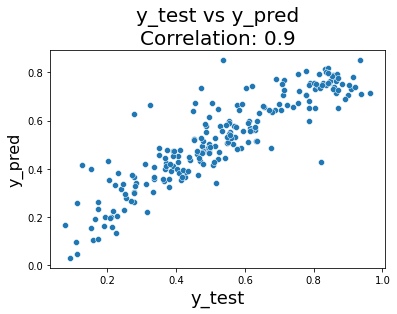

In [438]:
#plotting y_test and y_test_pred
corr = round(np.corrcoef(y_test, y_test_pred)[0][1],2)
sns.scatterplot(x = y_test, y = y_test_pred)
plt.title('y_test vs y_pred' + '\nCorrelation: ' + str(corr), fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

In [439]:
#calculating R-squared score on predicted data
r2_score_test = r2_score(y_test, y_test_pred)
round(r2_score_test,2)

0.8

### The R-squared score on predicted data from test dataset is 0.8